In [1]:
#Load related libraries to do analysis
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline

In [2]:
## III.2.1 Persiapan data dan impor ke Python

# library panda untuk menggunakan data frame
import pandas as pd

# Pengaturan folder tempat data / Google Colab

# Impor data dari excel xls ke Python
df = pd.read_excel('input/german_credit_easy.xls')

In [50]:
## Machine Learning Part

# machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#to check performance of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#plot
import matplotlib.pyplot as plt

In [4]:
# Loading dataset
df_encoded = pd.read_excel('input/german_credit_encoded.xlsx')

In [5]:
# 4. Modeling
## Preparation: set data input
X_Variables = df_encoded.drop(['default'], axis=1)
Y_Variable = df_encoded['default']

In [25]:
X_Variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   account_check_status_< 0 DM                                                 1000 non-null   int64  
 1   account_check_status_>= 200 DM / salary assignments for at least 1 year     1000 non-null   int64  
 2   account_check_status_no checking account                                    1000 non-null   int64  
 3   credit_history_critical account/ other credits existing (not at this bank)  1000 non-null   int64  
 4   credit_history_delay in paying off in the past                              1000 non-null   int64  
 5   credit_history_existing credits paid back duly till now                     1000 non-null   int64  
 6   credit_history_no credits taken/ all credits paid

In [10]:
# Jika dataset imbalance dimana target variable less than 10% of population, consider doing oversampling/undersampling
# For the rest of coding, not using oversampling

# menggunakan function SMOTE untuk melakukan kombinasi oversampling/undersampling
from imblearn.over_sampling import SMOTE

# function SMOTE dengan menerapkan proporsi 50%, maka ratio harus menjadi 1.0 Karena ratio mengacu pada proporsi gagal bayar
sm = SMOTE(random_state = 42)

# Hasil dari function SMOTE disimpan dalam variabel X dan y
X_imbal,y_imbal = sm.fit_sample(X_Variables,Y_Variable.ravel())

# Melihat jumlah bayar dan gagal bayar nasabah di y_imbal hasil dari SMOTE
import collections, numpy
collections.Counter(y_imbal)

Counter({0: 700, 1: 700})

In [12]:
# Menggunakan library dan fungsi train_test_split
from sklearn.model_selection import train_test_split

# Membagi data set menjadi train dan test, dimana proporsi test adalah 0.3 / 30% dari total data set
X_train, X_test, y_train, y_test = train_test_split(X_Variables, Y_Variable, test_size =0.3, random_state=42)

# Membagi lagi test data set menjadi dua, dimana 15% adalah test dan 15% digunakan sebagai validasi
X_test, X_test_holdup, y_test, y_test_holdup = train_test_split(X_test, y_test, test_size =0.5, random_state=42)

# Karena X_train dalam bentuk array, tidak akan tersimpan nama variabel independen. Oleh karena itu kita akan simpan dalam bentuk list nama-nama kolom
# Akan banyak nama kolomnya
kolom_short = ["act_0DM","act_200DM/salary","act_none","cre_his_critical/other_existing","cre_his_delay","cre_his_paid","cre_his_none/paid","purpose_business","purpose_car(new)","purpose_car(used)"    ,"purpose_appli","purpose_education","purpose_furniture","purpose_radio/television","purpose_repairs","purpose_retraining","sav_100DM","sav100_500DM","sav500_1000DM","sav_unknown","emp_1year"    ,"emp_1_4years","emp_4_7years","emp_unemployed","inst_2","inst_3","inst_4","male:divorced","male:married","male:single","debtors_guarantor","debtors_none","res_2","res_3","res_4"  ,"prop_other","prop_realestate","proy_unknown","other_ins_none","other_inst_stores","hous_own","hous_rent","credits_2","credits_3","credits_4","job_employee","job_unemployed","job_unskilled"   ,"people_2","phone_yes","foreign_yes","duration_in_month","credit_amount","age","cicilan_per_bulan"]

In [13]:
# Contoh jika menggunakan scale
# Tapi untuk contoh berikutnya tidak akang menggunakan scaling

# Menggunakan scaling dengan standard scaler dari library sklearn
from sklearn.preprocessing import StandardScaler

# Memanggil fungsi standard scaler
sc = StandardScaler()

# Merubah nilai X dari Train dan Test menjadi standardisation
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)
X_test_holdup_scale = sc.fit_transform(X_test_holdup)

<AxesSubplot:>

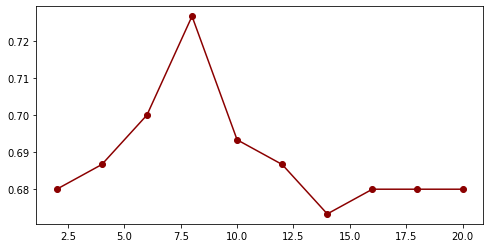

In [17]:
# Finding the most optimum max depth
# which is the the highest accuracy value

results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

<AxesSubplot:>

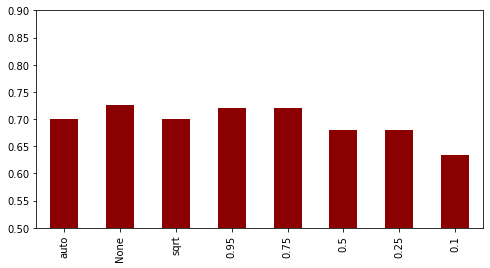

In [71]:
# Finding the most optimum max features options
# which is the the highest accuracy value
# update the variables from the best parameters

results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=8, random_state=101, max_features = trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_features_options).plot(kind="bar",color="darkred",ylim=(0.5,0.9))

<AxesSubplot:>

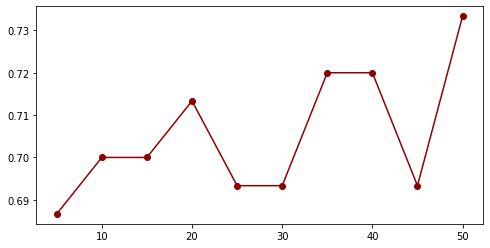

In [19]:
# Finding the most optimum min samples leaf options
# which is the the highest accuracy value
# update the variables from the best parameters

results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=4, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [21]:
# Tree prediction
# Update the parameter with the best values

dtree = DecisionTreeClassifier(max_depth=4, random_state=101, max_features = None, min_samples_leaf = 10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=101)

In [28]:
print(X_train.info())
kolom_short = ["act_0DM","act_200DM/salary","act_none","cre_his_critical/other_existing","cre_his_delay","cre_his_paid","cre_his_none/paid","purpose_business","purpose_car(new)","purpose_car(used)","purpose_appli","purpose_education","purpose_furniture","purpose_radio/television","purpose_repairs","purpose_retraining","sav_100DM","sav100_500DM","sav500_1000DM","sav_unknown","emp_1year","emp_1_4years","emp_4_7years","emp_unemployed","male:divorced","male:married","male:single","debtors_guarantor","debtors_none","prop_other","prop_realestate","prop_unknown","other_ins_none","other_inst_stores","hous_own","hous_rent","job_employee","job_unemployed","job_unskilled","phone_yes","foreign_yes","category_duration","category_duration2","duration_in_month","credit_amount","installment_income","present_residence","age","credit_this_bank","people_maintenance","cicilan_per_bulan"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 541 to 102
Data columns (total 51 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   account_check_status_< 0 DM                                                 700 non-null    int64  
 1   account_check_status_>= 200 DM / salary assignments for at least 1 year     700 non-null    int64  
 2   account_check_status_no checking account                                    700 non-null    int64  
 3   credit_history_critical account/ other credits existing (not at this bank)  700 non-null    int64  
 4   credit_history_delay in paying off in the past                              700 non-null    int64  
 5   credit_history_existing credits paid back duly till now                     700 non-null    int64  
 6   credit_history_no credits taken/ all credits pai

In [29]:
from sklearn import tree
with open("output/decisiontree_train.txt", "w") as f:
    f = tree.export_graphviz(dtree, out_file=f, feature_names=kolom_short)

#put the text result to http://www.webgraphviz.com/ to get the decision tree chart

In [70]:
predicted = dtree.predict_proba(X_test)
x_test2 = X_test.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
test_calc = pd.concat([x_test2,y_test2,pd.DataFrame(predicted)],axis=1)
test_calc.rename(columns={1: 'predicted'}, inplace=True)

max f:  0.25
max a:  0.4


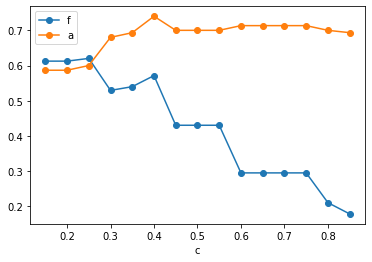

In [45]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['default'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_f = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max f: ",max_f)
print ("max a: ",max_a)

In [64]:
y_pred = dtree.predict_proba(x_test2)
test_calc = pd.concat([pd.DataFrame(y_test2),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={1: 'predicted'}, inplace=True)
# change x > depending on the result of max a
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.40 else 0)


In [65]:
print('\033[1m' + '\033[4m' + 'accuracy' + '\033[0m')
print(round(np.mean(test_calc['default']==test_calc['predicted'])*100,2),"%")
print('\n')
print('\033[1m' + '\033[4m' + 'classification_report' + '\033[0m')
print(classification_report(test_calc['default'],test_calc['predicted']))
print('\n')
print('\033[1m' + '\033[4m' + 'confusion_matrix' + '\033[0m')
print(confusion_matrix(test_calc['default'],test_calc['predicted']))

accuracy
74.0 %


classification_report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        99
           1       0.65      0.51      0.57        51

    accuracy                           0.74       150
   macro avg       0.71      0.68      0.69       150
weighted avg       0.73      0.74      0.73       150



confusion_matrix
[[85 14]
 [25 26]]


## Cost-Profit Consideration

Ultimately these statistical decisions must be translated into profit consideration for the bank. Let us assume that a correct decision of the bank would result in 35% profit at the end of 5 years. A correct decision here means that the bank predicts an application to be good or credit-worthy and it actually turns out to be credit worthy. When the opposite is true, i.e. bank predicts the application to be good but it turns out to be bad credit, then the loss is 100%. If the bank predicts an application to be non-creditworthy, then loan facility is not extended to that applicant and bank does not incur any loss (opportunity loss is not considered here). The cost matrix, therefore, is as follows:

## Resources
https://github.com/f2005636/Ensemble/blob/master/02%20DTREE.ipynb

In [69]:
df_table = confusion_matrix(test_calc['default'],test_calc['predicted'])
anc_pnc = df_table[0,0]
anc_pc = df_table[0,1]
ac_pnc = df_table[1,0]
ac_pc = df_table[1,1]

print("profit: ",(-1 * anc_pc + 0.35 * ac_pc))

profit:  -4.9
